<a href="https://colab.research.google.com/github/PauloCesarEngProd/Data_Science/blob/main/WebMotors_Seminovos_jul2021/MercadoSeminovos2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise dos Dados de *Web Scraping da WebMotors*
<p align="top"><img src="https://cdn.pixabay.com/photo/2018/12/10/10/21/earth-3866609__340.jpg"></p>


## O que é Web Scrapping?
A coleta de dados web, ou raspagem web, é uma forma de mineração que permite a extração de dados de sites da web convertendo-os em informação estruturada para posterior análise. O tipo mais básico de coleta é o download manual das páginas, copiando e colando o conteúdo, e isso pode ser feito por qualquer pessoa. Contudo, essa técnica geralmente é feita através de um software que simula uma navegação humana por diversos sites, extraindo informações específicas. É um campo com ativa evolução que compartilha um objetivo comum com a visão da web semântica, uma iniciativa ambiciosa que ainda requer avanços no processamento de texto, compreensão semantical, inteligência artificial e interação humano-computador. A coleta de dados web é muito semelhante à indexação web (utilizado pela maioria dos motores de busca), mas a motivação final é muito diferente. A indexação web é usada para ajudar a tornar os motores de busca mais eficientes, já a coleta de dados é tipicamente usada para diferentes razões, como comparação de preços online, monitoramentos meteorológicos, pesquisas de mercado, coleta de dados governamentais, monitoramento de dados e, em alguns casos, roubo.
#### `https://pt.wikipedia.org/wiki/Coleta_de_dados_web`



**Neste *notebook*, serão analisados os dados referentes à coleta realizada em 30 de julho de 2021, buscando identificar insights que possam ser extraídos a partir destes dados brutos quanto à comercialização de veículos seminovos.**


***ATENÇÃO:* Trabalho de finalidade didática com utilização de dados disponíveis na web.**

# Realizando as ações iniciais

**Bloco 1:** Importação das bibliotecas que serão utilizadas no trabalho.

In [ ]:
# Bloco 1: Importação de bibliotecas para trabalho
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#import folium

#configuração de visualizações
sns.set_style()
%matplotlib inline

# Realizando as ações iniciais

**Bloco 2:** Realizando da carga do arquivo de dados que será analisado.

In [ ]:
# Bloco 2: Importação do arquivo de dados para um Pandas DataFrame (df)
arquivo = '/content/drive/MyDrive/Colab Notebooks/Portfolio/MercadoSeminovos2021/Extração 30.07.21.xlsx'
df = pd.read_excel(arquivo)

# Sobre os Dados

<p align="top"><img src="https://cdn.pixabay.com/photo/2017/02/01/21/47/cube-2031512__340.jpg"></p>


Objetivo aqui é possibilitar um entendimento inicial de como estes dados estão estruturados.

Esse conjunto de dados é interessante pois está organizado sob forma análitica de coleção de anúncios realizados em ambiente web em um dos maiores marketplaces nacionais.



## Análise dos Dados

Inicialmente será realizado uma analise exploratória, cujo objetivo é possibilitar um entendimento prévio de como estes dados estão estruturados.


**Dicionário das variáveis**

*Descrição das colunas do arquivo de dados*
* `CodigoFipe` - Referência única da Tabela FIPE para identificação de veículos 
* `Marca` - Identificação da montadora do veículo
* `Modelo` - Identificação do tipo do veículo
* `AnoModelo` - Identificação do modelo do veículo conforme ano de lançamento
* `AnoFabricacao` - Identificação do modelo do veículo conforme ano de fabricação
* `RegraKM` - Variável categórica para agrupamento de períodos de quilometragem  
* `Quilometragem` - Quilometragem atual do veículo
* `PrecoAnuncio` - Valor do veículo anunciado
* `TipoAnuncio` - Identificação de anunciante Pessoa Física (PF) ou Pessoa jurírica (PJ) 
* `DescricaoSite` - Descrição do veículo anunciado
* `Cidade` - Cidade do veículo anunciado
* `Estado` - Estado do veículo anunciado
* `Pais` - País do veículo anunciado
* `MarketPlace` - Local de veículação do anúncio
* `Vendedor` - identificação do anunciante
* `VendedorMarketplace` - ???
* `IdAnuncio` - identificador do anúncio no Vendedor
* `LinkAnuncio` - URL do anúncio
* `DATA` - Data de coleta dos dados


-------
# Análises exploratórias iniciais
<img alt="Colaboratory logo" width="10%" src="https://qualidadenapratica.files.wordpress.com/2012/06/analise.jpg?w=640">


**Bloco 1:** Obtenção do tamanho (volume de dados) do arquivo e identificação dos tipos de dados das variáveis (colunas) deste dataset .



In [ ]:
# Bloco 1: Obtenção do tamanho do arquivo e identificação dos tipos de dados

#identificação do volume de dados do DataFrame
print("Número de registros (entradas/linhas): \t {}".format(df.shape[0]))
print("Número de variáveis (colunas): \t {} \n".format(df.shape[1]))


Número de registros (entradas/linhas): 	 92291
Número de variáveis (colunas): 	 19 



In [ ]:
# Bloco 1: verificação dos tipos de dados deste dataset
print("Lista dos tipos de dados do conjunto em análises:")
display(df.dtypes)

Lista dos tipos de dados do conjunto em análises:


CodigoFipe                     object
Marca                          object
Modelo                         object
AnoModelo                       int64
AnoFabricacao                   int64
RegraKM                        object
Quilometragem                   int64
PrecoAnuncio                  float64
TipoAnuncio                    object
DescricaoSite                  object
Cidade                         object
Estado                         object
Pais                           object
MarketPlace                    object
Vendedor                       object
vendedorMarketplace            object
IdAnuncio                       int64
LinkAnuncio                    object
DATA                   datetime64[ns]
dtype: object

# Análises exploratórias iniciais
<img alt="Colaboratory logo" width="10%" src="https://qualidadenapratica.files.wordpress.com/2012/06/analise.jpg?w=640">

**Bloco 2:** Verificação dos primeiros 5 registros e dos 5 últimos registros do dataset para um conhecimento prévio dos dados sob trabalho.



In [ ]:
#Bloco 2: verificando os 5 primeiros registros
df.head(5)

,CodigoFipe,Marca,Modelo,AnoModelo,AnoFabricacao,RegraKM,Quilometragem,PrecoAnuncio,TipoAnuncio,DescricaoSite,Cidade,Estado,Pais,MarketPlace,Vendedor,vendedorMarketplace,IdAnuncio,LinkAnuncio,DATA
0,NaN,KIA,SPORTAGE,2020,2019,ATÉ 15 (KM),1628,171480.0,PJ,NEW SPORTAGE EX 2.0 FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,102522,https://seminovos.localiza.com/kia_sportage_ex...,2021-07-30
1,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),5940,81450.0,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,110397,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30
2,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),6830,81070.0,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,OSASCO,SP,BR,NaN,LOCALIZA,Localiza,108256,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30
3,NaN,BMW,X4,2017,2016,ATÉ 15 (KM),7454,295910.0,PJ,X4 XDRIVE 35I M SPORT 3.0 4P C/AR - AUTOMATICO...,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,105992,https://seminovos.localiza.com/bmw_x4_xdrive_2...,2021-07-30
4,NaN,JEEP,RENEGADE,2019,2019,ATÉ 15 (KM),7496,94060.0,PJ,RENEGADE LONGITUDE 1.8 16V FLEX 4P C/AR - AUTO...,NITEROI,RJ,BR,NaN,LOCALIZA,Localiza,110387,https://seminovos.localiza.com/jeep_renegade_l...,2021-07-30


In [ ]:
#Bloco 2: verificando os 5 últimos registros
df.tail(5)

,CodigoFipe,Marca,Modelo,AnoModelo,AnoFabricacao,RegraKM,Quilometragem,PrecoAnuncio,TipoAnuncio,DescricaoSite,Cidade,Estado,Pais,MarketPlace,Vendedor,vendedorMarketplace,IdAnuncio,LinkAnuncio,DATA
92286,015165-3,HYUNDAI,HB20,2020,2019,ACIMA 80 (KM),1111111111,59800.0,PJ,1.0 12V FLEX SENSE MANUAL,CASCAVEL,PR,BR,WEBMOTORS,WEBMOTORS,P1 VEICULOS,37601307,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
92287,001315-3,FIAT,PALIO,2018,2017,ACIMA 80 (KM),1111111111,59900.0,PJ,1.4 MPI ATTRACTIVE WEEKEND 8V FLEX 4P MANUAL,CURITIBA,PR,BR,WEBMOTORS,WEBMOTORS,W521 PREMIUM,37825984,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
92288,004421-0,CHEVROLET,COBALT,2017,2016,ACIMA 80 (KM),1111111111,64900.0,PJ,1.8 MPFI LTZ 8V FLEX 4P AUTOMATICO,CURITIBA,PR,BR,WEBMOTORS,WEBMOTORS,W521 PREMIUM,37825830,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
92289,004421-0,CHEVROLET,COBALT,2019,2019,ACIMA 80 (KM),1111111111,68900.0,PJ,1.8 MPFI LTZ 8V FLEX 4P AUTOMATICO,JATAI,GO,BR,WEBMOTORS,WEBMOTORS,CARVALHO AUTOMOVEIS,37777151,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
92290,005486-0,VOLKSWAGEN,VIRTUS,2019,2018,ACIMA 80 (KM),1111111111,73900.0,PJ,1.6 MSI TOTAL FLEX MANUAL,CURITIBA,PR,BR,WEBMOTORS,WEBMOTORS,W521 PREMIUM,37825975,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30


# Análises exploratórias iniciais
<img alt="Colaboratory logo" width="10%" src="https://qualidadenapratica.files.wordpress.com/2012/06/analise.jpg?w=640">

**Bloco 3:** Verificação de valores ausentes para devidas considerações e tratativas. 

Conforme observável abaixo, apenas as colunas `CodigoFipe` e `MarketPlace` possuem pequenos percentuais de valores ausente, respectivamente 8,38% e 6,73%.
Considerando estas colunas não sendo críticas de análises, não serão realizados quaisquer tratamentos nestas variáveis.

In [ ]:
#Bloco 3:
#Acionar a função Pandas para formatação de valores
pd.options.display.float_format = "{:.2f}".format

#Verificação da porcentagem de valores ausentes (ordenação decrescente)
print("Variável \t Percentual Ausente \n")
(df.isnull().sum() / df.shape[0] *100).sort_values(ascending = False)

Variável 	 Percentual Ausente 



CodigoFipe            8.38
MarketPlace           6.73
TipoAnuncio           0.00
Marca                 0.00
Modelo                0.00
AnoModelo             0.00
AnoFabricacao         0.00
RegraKM               0.00
Quilometragem         0.00
PrecoAnuncio          0.00
DATA                  0.00
LinkAnuncio           0.00
Cidade                0.00
Estado                0.00
Pais                  0.00
Vendedor              0.00
vendedorMarketplace   0.00
IdAnuncio             0.00
DescricaoSite         0.00
dtype: float64

# Análises exploratórias iniciais
<img alt="Colaboratory logo" width="10%" src="https://qualidadenapratica.files.wordpress.com/2012/06/analise.jpg?w=640">

**Bloco 4:** Verificação estatística básica das variáveis quantitativas que serão fortemente consideradas em todo processo de análise sequencial. 

Conforme observável abaixo, as colunas `Quilometragem` e `PrecoAnuncio` possuem desvio padrão muito altos que representam indícios de outliers (valores discrepantes), que podem ser melhor observados pelos valores máximos descritos em comparação ao valor de terceiro quartil (75%).

Logo abaixo são plotados histogramas para estas mesmas variáveis quantitativas que colaboram com uma visão gráfica para um melhor estudo.


**Entendo um pouco sobre a tabela estatística básica abaixo:**
* `Count:` contador do número de ocorrências (registros/linhas)
* `Mean:` valor médio encontrado
* `std:` desvio padrão relativo à média
* `min:` menor valor encontrado
* `25%:` primeiro quartil ou quartil inferior; valor aos 25% da amostra ordenada. 
* `50%:` segundo quartil (mediana); valor até ao qual se encontra 50% da amostra ordenada
* `75%:` terceiro quartil ou quartil superior; valor a partir do qual se encontram 25% dos valores mais elevados 
* `max:` maior valor encontrado

Obs.: à diferença entre os quartis superior e inferior chama-se amplitude inter-quartil (IQR).


In [ ]:
##Bloco 4: verificação estatística básica para variáveis quantitativas do DataFrame
df.describe()

,AnoModelo,AnoFabricacao,Quilometragem,PrecoAnuncio,IdAnuncio
count,92291.00,92291.00,92291.00,92291.00,92291.00
mean,2019.09,2018.46,222635.97,133748.01,34829341.24
std,1.53,1.56,13696449.47,6507544.63,9374588.20
min,2013.00,2012.00,0.00,16900.00,21436.00
25%,2018.00,2018.00,26500.00,51900.00,37066942.50
50%,2019.00,2019.00,45000.00,66990.00,37571980.00
75%,2020.00,2019.00,59131.50,95900.00,37782074.00
max,2022.00,2022.00,1111111111.00,1111111168.00,37901424.00


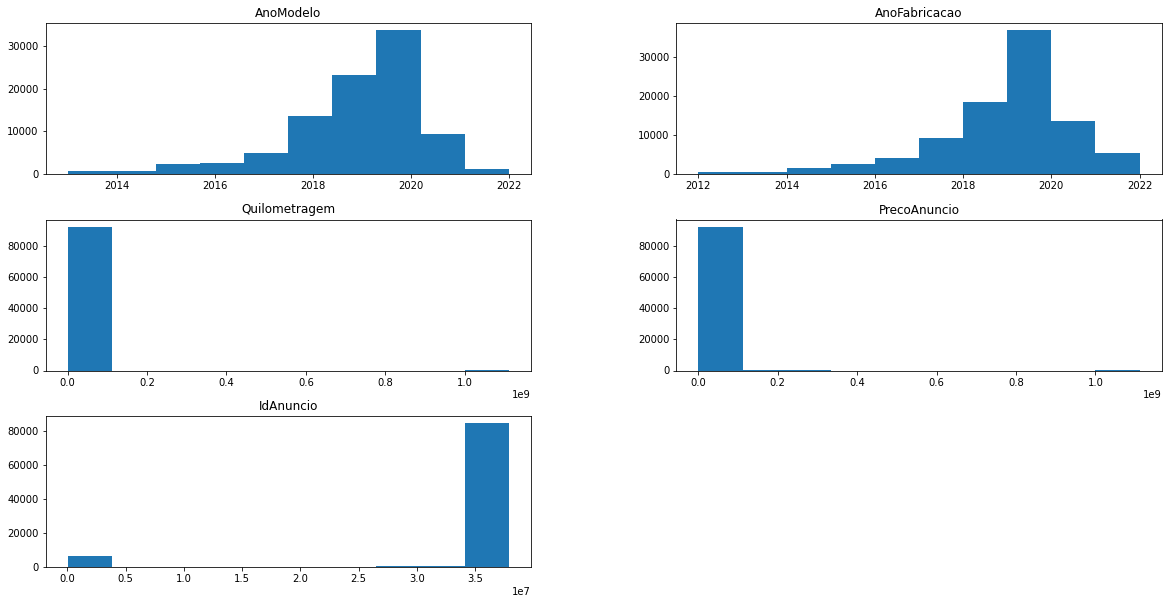

In [ ]:
##Bloco 4: Plotagem de histgramas para variáveis quantitativas do DataFrame
df.hist(figsize=(20,10), grid = False);

# Análises exploratórias iniciais
<img alt="Colaboratory logo" width="10%" src="https://qualidadenapratica.files.wordpress.com/2012/06/analise.jpg?w=640">

**Bloco 5** Preparação e plotagem de gráfico tipo boxplot ou diagrama de caixa que permite visualizar a distribuição e valores discrepantes (outliers) dos dados.

Para as variáveis `PrecoAnuncio` e `Quilometragem`, serão obtidos os quartis e a variação interquartil (IQR) que contribuirá para a avaliação do grau de dispersão (espalhamento dos dados) em torno das medidas centrais.

Em seguida serão plotados os respectivos gráficos boxplot que possibilitarão uma visão destas distribuições de valores para as variáveis em estudo.

Através das análises das plotagens, pode-se identificar que para o volume de dados total (92.291), respectivamente, para as variáveis `PrecoAnuncio` e `Quilometragem`, 5.01% (4.622) e 3.68% (3.399) dos valores encontrados no arquivo de dados são **outliers**.

Tendo isto sendo identificado, a boa prática de analise exploratória orienta a serem buscados identificar as causas destas discrepâncias com execução das devidas ações para evitar que dados valiosos se percam no processo.

`No âmbito deste trabalho`, por considerar ser o volume de dados abaixo de 10%, inclusive podendo haver outliers simultâneos para um mesmo registro, os registros correspondentes destes ouliers serão excluídos para não impactar negatvamente nas considerações de análise.

In [ ]:
#Bloco 5:
# obtenção dos quartis e IQR para a variável PrecoAnuncio
q1_PrecoAnuncio = df.PrecoAnuncio.quantile(.25)
q3_PrecoAnuncio = df.PrecoAnuncio.quantile(.75)
IQR_PrecoAnuncio = q3_PrecoAnuncio - q1_PrecoAnuncio

# definindo os limites SUPERIOR e INFERIOR                                    
sup_PrecoAnuncio = q3_PrecoAnuncio + 1.5 * IQR_PrecoAnuncio
inf_PrecoAnuncio = q1_PrecoAnuncio - 1.5 * IQR_PrecoAnuncio

# Mostrando em tela os valores encontrados 
print('IQR da variável PrecoAnuncio: ', IQR_PrecoAnuncio)
print('Limite superior de PrecoAnuncio: ', sup_PrecoAnuncio)
print('Limite inferior de PrecoAnuncio: ', inf_PrecoAnuncio)

IQR da variável PrecoAnuncio:  44000.0
Limite superior de PrecoAnuncio:  161900.0
Limite inferior de PrecoAnuncio:  -14100.0


In [ ]:
#Bloco 5:
# obtenção dos quartis e IQR para a variável Quilometragem	
q1_Quilometragem	 = df.Quilometragem	.quantile(.25)
q3_Quilometragem	 = df.Quilometragem	.quantile(.75)
IQR_Quilometragem	 = q3_Quilometragem	 - q1_Quilometragem	

# definindo os limites SUPERIOR e INFERIOR                                       
sup_Quilometragem	 = q3_Quilometragem	 + 1.5 * IQR_Quilometragem	
inf_Quilometragem	 = q1_Quilometragem	 - 1.5 * IQR_Quilometragem	

# Mostrando em tela os valores encontrados
print('IQR da variável Quilometragem	: ', IQR_Quilometragem	)
print('Limite superior de Quilometragem	: ', sup_Quilometragem	)
print('Limite inferior de Quilometragem	: ', inf_Quilometragem)

IQR da variável Quilometragem	:  32631.5
Limite superior de Quilometragem	:  108078.75
Limite inferior de Quilometragem	:  -22447.25


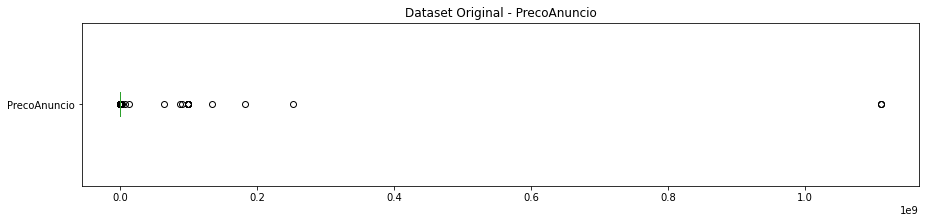

O dataset original  possui 92291 colunas
4622 Entradas são outliers, ou seja, estão acima do limite superior que é 161.900
Representando 5.01% do total do dataset


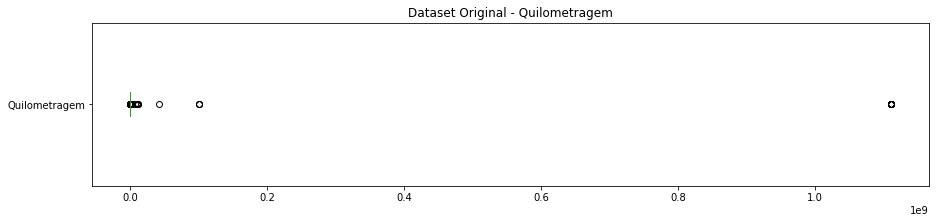

O dataset original  possui 92291 colunas
3399 Entradas são outliers, ou seja, estão acima do limite superior que é 108078.75
Representando 3.68% do total do dataset


In [ ]:
#Bloco 5:
# Plotagem do Boxplot para a variável PrecoAnuncio
fig, ax = plt.subplots(figsize=(15,3))
df.PrecoAnuncio.plot(kind='box', vert=False);
ax.set_title('Dataset Original - PrecoAnuncio')
plt.show()

print("O dataset original  possui {} colunas".format(df.shape[0]))
print("{} Entradas são outliers, ou seja, estão acima do limite superior que é 161.900".format(len(df[df.PrecoAnuncio > sup_PrecoAnuncio])))
print("Representando {:.2f}% do total do dataset".format((len(df[df.PrecoAnuncio > sup_PrecoAnuncio]) / df.shape[0])*100))


# Plotagem do Boxplot para a variável Quilometragem
fig, ax = plt.subplots(figsize=(15,3))
df.Quilometragem.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Quilometragem')
plt.show()

print("O dataset original  possui {} colunas".format(df.shape[0]))
print("{} Entradas são outliers, ou seja, estão acima do limite superior que é 108078.75".format(len(df[df.Quilometragem > sup_Quilometragem])))
print("Representando {:.2f}% do total do dataset".format((len(df[df.Quilometragem > sup_Quilometragem]) / df.shape[0])*100))

--------
# Análises exploratórias pós limpeza de dados discrepantes (outliers)
<img alt="Colaboratory logo" width="10%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRSLvRaTnknXLoiacc_nrdSFJ0x-iMHqlwFSADRLopiiOBGt4whGQ62ofhFCWjrSmvn2bo&usqp=CAU">

**Bloco 1** Neste bloco, será criado um novo dataset onde constarão os registros `"limpos"` dos outliers identificados anteiormente.

Após a criação do novo dataset, o anterior original permanace intacto, serão revisitadas as análises por tabela de estatísticas básicas, histogramas e boxplot para reanálises destes dados limpos.

importante ter em mente que novos valores estatíticos foram criados considerando a massa de dados atual (`dados limpos`), ou seja, novos outliers surgiram, porém não mais nos interessa pois já são fruto do trabalho inicial, porém interessante perceber que estes novos outliers estão no limite da análise anterior o que é o esperado.


In [ ]:
#Bloco 1:
# criando uma cópia da base de dados
df_limpo = df.copy()

# limpando na nova base de dados os outliers para Quilometragem e PrecoAnuncio
df_limpo.drop(df_limpo[df_limpo.PrecoAnuncio > sup_PrecoAnuncio].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.Quilometragem > sup_Quilometragem].index,  axis=0, inplace= True)

In [ ]:
#Bloco 1: Comparando as bases de dados: original ("suja") com atual ("limpa)
print('Formato antes da limpeza: ', df.shape)
print('Formato após a limpeza: ',df_limpo.shape)
print('Número de registros excluídos = ',df.shape[0]-df_limpo.shape[0])
print('Percentual de registros excluídos = {:.2f}%'.format((df.shape[0]-df_limpo.shape[0]) / df.shape[0] * 100))

Formato antes da limpeza:  (92291, 19)
Formato após a limpeza:  (84351, 19)
Número de registros excluídos =  7940
Percentual de registros excluídos = 8.60%


In [ ]:
##Bloco 1: verificação estatística básica para variáveis quantitativas do novo DataFrame (limpo)
df_limpo.describe()

,AnoModelo,AnoFabricacao,Quilometragem,PrecoAnuncio,IdAnuncio
count,84351.00,84351.00,84351.00,84351.00,84351.00
mean,2019.16,2018.53,43203.40,74658.37,34750648.78
std,1.45,1.47,24208.37,28988.57,9515861.08
min,2013.00,2012.00,0.00,17900.00,21436.00
25%,2018.00,2018.00,27000.00,51900.00,37063907.50
50%,2019.00,2019.00,44800.00,65390.00,37572188.00
75%,2020.00,2019.00,57465.00,91990.00,37782871.00
max,2022.00,2022.00,108065.00,161900.00,37901424.00


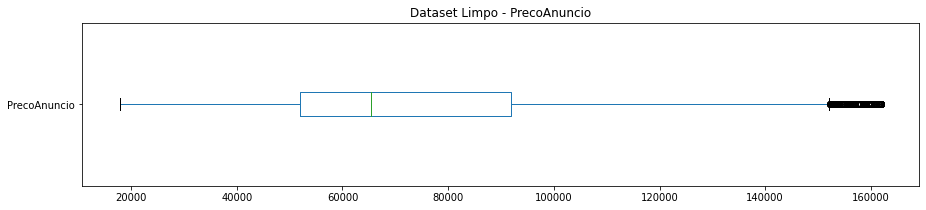

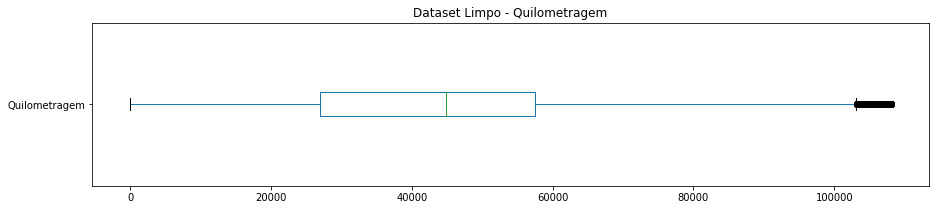

In [ ]:
#Bloco 1: plotagem dos Boxplot para o conjunto de dados limpos (sem outliers)
fig, ax = plt.subplots(figsize=(15,3))
df_limpo.PrecoAnuncio.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - PrecoAnuncio')
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
df_limpo.Quilometragem.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - Quilometragem')
plt.show()


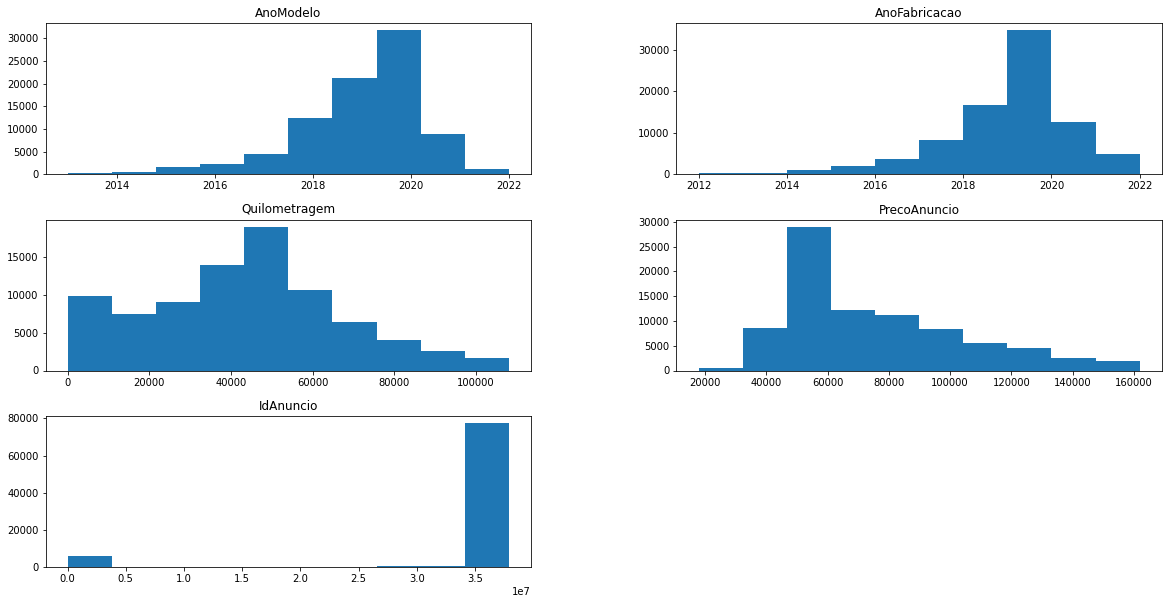

In [ ]:
#Bloco 1: verificando as novas distribuições pós limpeza
df_limpo.hist(figsize=(20,10), grid = False);

In [ ]:
#Bloco 1: verificando os 5 registros iniciais 
df_limpo.head()

,CodigoFipe,Marca,Modelo,AnoModelo,AnoFabricacao,RegraKM,Quilometragem,PrecoAnuncio,TipoAnuncio,DescricaoSite,Cidade,Estado,Pais,MarketPlace,Vendedor,vendedorMarketplace,IdAnuncio,LinkAnuncio,DATA
1,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),5940,81450.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,110397,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30
2,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),6830,81070.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,OSASCO,SP,BR,NaN,LOCALIZA,Localiza,108256,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30
4,NaN,JEEP,RENEGADE,2019,2019,ATÉ 15 (KM),7496,94060.00,PJ,RENEGADE LONGITUDE 1.8 16V FLEX 4P C/AR - AUTO...,NITEROI,RJ,BR,NaN,LOCALIZA,Localiza,110387,https://seminovos.localiza.com/jeep_renegade_l...,2021-07-30
5,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),7991,81070.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,MOGI DAS CRUZES,SP,BR,NaN,LOCALIZA,Localiza,109137,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30
6,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),8583,80750.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,110078,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30


In [ ]:
#Bloco 1: verificando os 5 registros finais
df_limpo.tail()

,CodigoFipe,Marca,Modelo,AnoModelo,AnoFabricacao,RegraKM,Quilometragem,PrecoAnuncio,TipoAnuncio,DescricaoSite,Cidade,Estado,Pais,MarketPlace,Vendedor,vendedorMarketplace,IdAnuncio,LinkAnuncio,DATA
88902,017051-8,JEEP,COMPASS,2018,2018,ACIMA 80 (KM),108000,146000.00,PF,2.0 16V DIESEL LIMITED 4X4 AUTOMATICO,VARGINHA,MG,BR,WEBMOTORS,WEBMOTORS,ANDRE,36820990,https://www.webmotors.com.br/api/detail/car/36...,2021-07-30
88903,002093-1,TOYOTA,HILUX,2015,2014,ACIMA 80 (KM),108000,154900.00,PJ,3.0 SRV 4X4 CD 16V TURBO INTERCOOLER DIESEL 4P...,TEOFILO OTONI,MG,BR,WEBMOTORS,WEBMOTORS,LEOZAO AUTOMOVEIS,36751838,https://www.webmotors.com.br/api/detail/car/36...,2021-07-30
88905,003408-8,FORD,KA,2018,2017,ACIMA 80 (KM),108005,39900.00,PJ,1.0 TI-VCT FLEX SE MANUAL,SAO PAULO,SP,BR,WEBMOTORS,WEBMOTORS,CARRERA NISSAN MORUMBI,37819964,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
88906,001461-3,FIAT,MOBI,2018,2018,ACIMA 80 (KM),108041,40990.00,PJ,1.0 EVO FLEX LIKE. MANUAL,GUARULHOS,SP,BR,WEBMOTORS,WEBMOTORS,HORIZONCAR,37774537,https://www.webmotors.com.br/api/detail/car/37...,2021-07-30
88907,005338-4,VOLKSWAGEN,AMAROK,2019,2018,ACIMA 80 (KM),108065,122000.00,PJ,2.0 S 4X4 CS 16V TURBO INTERCOOLER DIESEL 2P M...,SORRISO,MT,BR,WEBMOTORS,WEBMOTORS,AUTO MAIS VEICULOS MULTIMARCAS,36252525,https://www.webmotors.com.br/api/detail/car/36...,2021-07-30


-------
# Análises críticas sob novo volume de dados

<p align="top"><img src="https://cdn.pixabay.com/photo/2015/10/19/07/38/hand-995564__340.jpg", width="100%"></p>


A partir deste ponto as análises terão foco na busca por `insights` favoráveis ao mercado de veículos seminovos.




**Bloco 1** neste primeiro bloco serão analisadas as correlações entre as variáveis quantitativas `AnoModelo`,	`AnoFabricacao`, `Quilometragem` e	`PrecoAnuncio` que são aquelas de interesse ao objetivo deste estudo. Correlação significa que existe uma relação entre duas coisas, em nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. 

Para identificar as correlações existentes entre as variáveis de interesse serão criados:
* uma matriz de correlação
* um *heatmap* (mapa de calor) a partir dessa matriz de correlação

Uma Matriz de Correlação mostra os valores de correlação de `Pearson`, que medem o grau de relação linear entre cada par de variáveis através de valores entre (-1 e 1) o grau de relacionamento entre 2 variáveis da seguinte forma:
*   Quanto mais próximo de 1 significa uma correlação mais intensa.
*   Quando possuir valores positivos significa uma correlação diretamente proporcional entre as variáveis.
*   Quando possuir valores negativoss significa uma correlação inversamente proporcional entre as variáveis.



##### **Lembrando que** 
`uma matriz de correlação é uma tabela utilizada para fornecer um entendimento prévio da coesão de relacionamento entre as variáveis, porém não significa de nenhma forma causalidade entre estas variáveis`.


In [ ]:
#Bloco 1: Criaçao de matriz de correlação
correlacao = df_limpo[["AnoModelo",	"AnoFabricacao", "Quilometragem",	"PrecoAnuncio" ]].corr()
display(correlacao)

,AnoModelo,AnoFabricacao,Quilometragem,PrecoAnuncio
AnoModelo,1.00,0.94,-0.52,0.19
AnoFabricacao,0.94,1.00,-0.53,0.21
Quilometragem,-0.52,-0.53,1.00,-0.33
PrecoAnuncio,0.19,0.21,-0.33,1.00


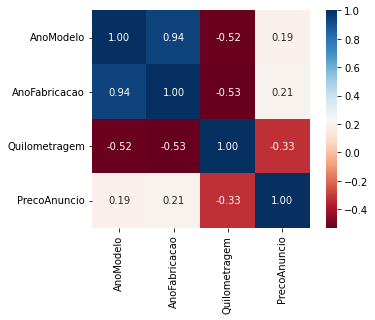

In [ ]:
#Bloco 1: Criaçao de heatmap
sns.heatmap(data = correlacao, cmap = "RdBu", fmt='.2f', square = True, linecolor = "white", annot= True );

-------------
**Bloco 2** Construção de Tabela Dinâmica

Uma tabela dinâmica é uma tabela de valores agrupados que agrega os itens individuais de uma tabela mais extensa em uma ou mais categorias discretas, podendo incluir somas, médias ou outras estatísticas, agrupadas através de uma função de agregação escolhida e aplicada aos valores agrupados.

Abaixo tabela dinâmica tendo como colunas agregadoras `Estado`, `Cidade`, `Marca`, `Modelo`, `AnoModelo`, `RegraKM` e tendo `PrecoAnuncio` como coluna agregada.


In [ ]:
#Bloco 2: Criação de Tabela dinâmica
table = pd.pivot_table(df_limpo, values=['PrecoAnuncio'], index=["Estado", "Cidade", "Marca", "Modelo", "AnoModelo", "RegraKM"],
                       aggfunc={'PrecoAnuncio': [np.mean, np.median, min, max, sum, np.count_nonzero]})
table.sort_values(by=('PrecoAnuncio', 'sum'), ascending=False) [:20]

PrecoAnuncio  ...            
                                                           count_nonzero  ...         sum
Estado Cidade    Marca      Modelo   AnoModelo RegraKM                    ...            
SP     SAO PAULO VOLKSWAGEN NIVUS    2021      ATÉ 15 (KM)        157.00  ... 19080489.53
                 NISSAN     KICKS    2022      ATÉ 15 (KM)        153.00  ... 18881177.76
                 VOLKSWAGEN T-CROSS  2021      ATÉ 15 (KM)        136.00  ... 18484961.64
PE     CARPINA   JEEP       COMPASS  2018      15-25 (KM)         131.00  ... 14501700.00
SP     SAO PAULO FIAT       ARGO     2020      45-60 (KM)         237.00  ... 13347217.00
PE     TABIRA    JEEP       COMPASS  2018      15-25 (KM)         104.00  ... 11512800.00
SP     SAO PAULO JEEP       RENEGADE 2021      ATÉ 15 (KM)        108.00  ... 10099678.99
MG     VARGINHA  NISSAN     KICKS    2022      ATÉ 15 (KM)         80.00  ...  9541653.00
SP     SAO PAULO CHEVROLET  ONIX     2019      45-60 (KM)         180.00  ...  9401248.00
                            JOY      2020      45-60 (KM)         174.00  ...  9025072.00
                 HYUNDAI    CRETA    2021      ATÉ 15 (KM)         81.00  ...  8813933.75
                 RENAULT    LOGAN    2020      45-60 (KM)         166.00  ...  8599069.00
                 FORD       KA       2020      45-60 (KM)         162.00  ...  8265273.00
                 RENAULT    SANDERO  2020      45-60 (KM)         149.00  ...  7722970.00
PE     CARPINA   VOLKSWAGEN VOYAGE   2019      15-25 (KM)         132.00  ...  7656000.00
SP     SAO PAULO VOLKSWAGEN T-CROSS  2020      45-60 (KM)          65.00  ...  7217668.88
PE     TABIRA    VOLKSWAGEN VOYAGE   2019      15-25 (KM)         120.00  ...  6960000.00
SP     SAO PAULO VOLKSWAGEN VIRTUS   2020      45-60 (KM)          90.00  ...  6914880.00
                 CHEVROLET  PRISMA   2019      45-60 (KM)         117.00  ...  6701429.00
                            ONIX     2020      45-60 (KM)          89.00  ...  6223391.00

[20 rows x 6 columns]

In [ ]:
#Bloco 2: aplicando um filtro específico ALEATÓRIO  - 1
(table[('PrecoAnuncio', 'max')]==161900.00).sum()

18

In [ ]:
#Bloco 2: aplicando um filtro específico ALEATÓRIO  - 2
table.loc[('SP', 'SAO PAULO', 'TOYOTA', 'COROLLA')].sort_values(by=('PrecoAnuncio', 'sum'), ascending=True)

PrecoAnuncio            ...                     
                        count_nonzero       max  ...       min        sum
AnoModelo RegraKM                                ...                     
2017      45-60 (KM)             1.00  79900.00  ...  79900.00   79900.00
          35-45 (KM)             1.00  85900.00  ...  85900.00   85900.00
2019      ACIMA 80 (KM)          1.00  91429.00  ...  91429.00   91429.00
2021      35-45 (KM)             1.00 118890.00  ... 118890.00  118890.00
2017      ACIMA 80 (KM)          2.00  83890.00  ...  77900.00  161790.00
2018      15-25 (KM)             2.00  89900.00  ...  86900.00  176800.00
          25-35 (KM)             3.00  87000.00  ...  77900.00  248900.00
2017      60-80 (KM)             4.00  87900.00  ...  76800.00  319700.00
2018      ACIMA 80 (KM)          4.00  85990.00  ...  81800.00  337190.00
2021      25-35 (KM)             3.00 124990.00  ... 124990.00  374970.00
2019      25-35 (KM)             4.00  99990.00  ...  93900.00  387490.00
2020      25-35 (KM)             3.00 150900.00  ... 132000.00  422700.00
2018      60-80 (KM)             5.00  93990.00  ...  80990.00  428880.00
2020      35-45 (KM)             4.00 128000.00  ... 122000.00  498990.00
          ATÉ 15 (KM)            4.00 146800.00  ... 129900.00  552690.00
2021      15-25 (KM)             4.00 158000.00  ... 146890.00  612870.00
2019      ATÉ 15 (KM)            6.00 143010.00  ...  93890.00  615670.00
2018      35-45 (KM)             9.00 102900.00  ...  85000.00  809442.00
          45-60 (KM)            10.00  91990.00  ...  82780.00  871358.00
2020      15-25 (KM)             7.00 151990.00  ... 120000.00  935880.00
2019      60-80 (KM)            10.00 137390.00  ...  87490.00  970758.00
          15-25 (KM)            11.00 113720.00  ...  94980.00 1156430.00
          45-60 (KM)            14.00  97900.00  ...  89890.00 1311270.00
          35-45 (KM)            18.00  98990.00  ...  90800.00 1697957.00
2021      ATÉ 15 (KM)           26.00 161500.00  ... 115900.00 3772902.77

[25 rows x 6 columns]

-------------
**Bloco 3** Construção de Gráficos de Barras

Sendo gráfico de barras uma forma de resumir um conjunto de dados categóricos, utilizaremos deste recursos para analisar a variável  de valor `PrecoAnuncio` e seu comportamento agregado frente às variáveis categóricas `Estado`, `Cidade`, `RegraKM`, `AnoModelo` e `Vendedor`, visualizando assim os valores acumulados (somatório) para uma destas categorias, respondendo às perguntas de quanto $ acumulado nos anúncios veículados.

**Os valores estarão representados em unidades por milhão.**


### Grafico de Barras por Estados

In [ ]:
#Bloco 3: Agrupando Somatório de PrecoAnuncio por estado
Estados_precos = df_limpo[['Estado', 'PrecoAnuncio']].groupby('Estado').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
Estados_precos = Estados_precos.reset_index()
Estados_precos["PrecoAnuncioMilhao"] = Estados_precos["PrecoAnuncio"] / 1000000

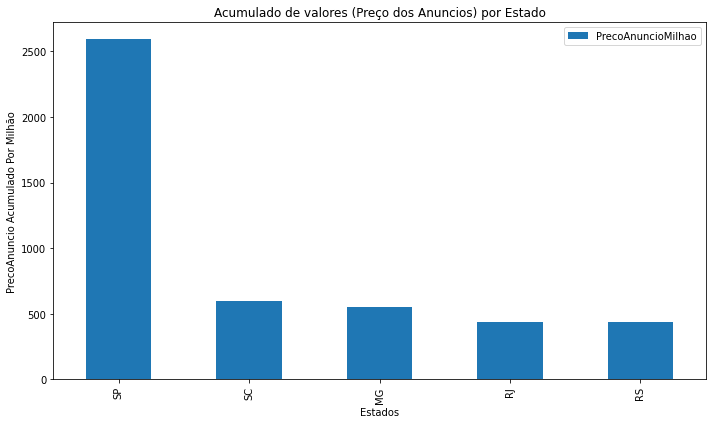

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por estado
fig, ax = plt.subplots(figsize=(10,6))
Estados_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='Estado', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por Estado')
ax.set_xlabel('Estados')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

------------------------------
### Grafico de Barras por Cidades

In [ ]:
#Bloco 3: Agrupando Somatório de PrecoAnuncio por Cidades
Cidades_precos = df_limpo[['Estado', 'Cidade', 'PrecoAnuncio']].groupby(['Estado', 'Cidade']).sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
Cidades_precos = Cidades_precos.reset_index()
Cidades_precos["PrecoAnuncioMilhao"] = Cidades_precos["PrecoAnuncio"] / 1000000


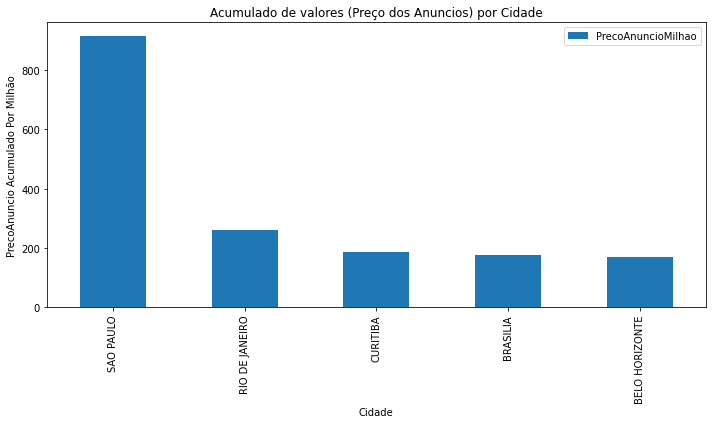

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por Cidades
fig, ax = plt.subplots(figsize=(10,6))
Cidades_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='Cidade', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por Cidade')
ax.set_xlabel('Cidade')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

---------------
### Grafico de Barras por Cidade em um Estado específicado 

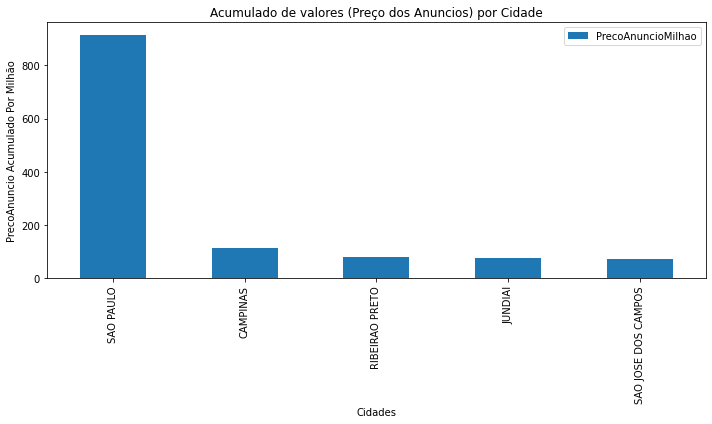

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por Cidades para um Estado especificado
fig, ax = plt.subplots(figsize=(10,6))
Cidades_precos[Cidades_precos['Estado'] =='SP'].sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='Cidade', y='PrecoAnuncioMilhao', kind='bar', ax=ax)

ax.set_title('Acumulado de valores (Preço dos Anuncios) por Cidade')
ax.set_xlabel('Cidades')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

------------------------------
### Grafico de Barras por RegraKM

In [ ]:
#Bloco 3: Agrupando Somatório de PrecoAnuncio por RegraKM
RegraKM_precos = df_limpo[['RegraKM', 'PrecoAnuncio']].groupby('RegraKM').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
RegraKM_precos = RegraKM_precos.reset_index()
RegraKM_precos["PrecoAnuncioMilhao"] = RegraKM_precos["PrecoAnuncio"] / 1000000

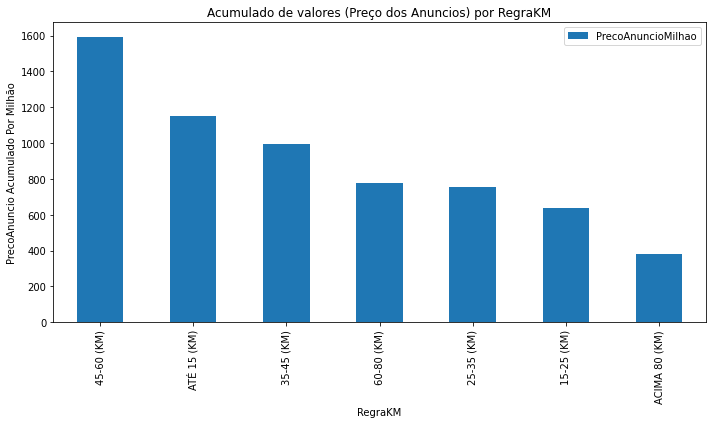

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por RegraKM
fig, ax = plt.subplots(figsize=(10,6))
RegraKM_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False).plot(x='RegraKM', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por RegraKM')
ax.set_xlabel('RegraKM')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

------------------------------
### Grafico de Barras por AnoModelo

In [ ]:
#Bloco 3: Agrupando Somatório de PrecoAnuncio por AnoModelo
AnoModelo_precos = df_limpo[['AnoModelo', 'PrecoAnuncio']].groupby('AnoModelo').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
AnoModelo_precos = AnoModelo_precos.reset_index()
AnoModelo_precos["PrecoAnuncioMilhao"] = AnoModelo_precos["PrecoAnuncio"] / 1000000

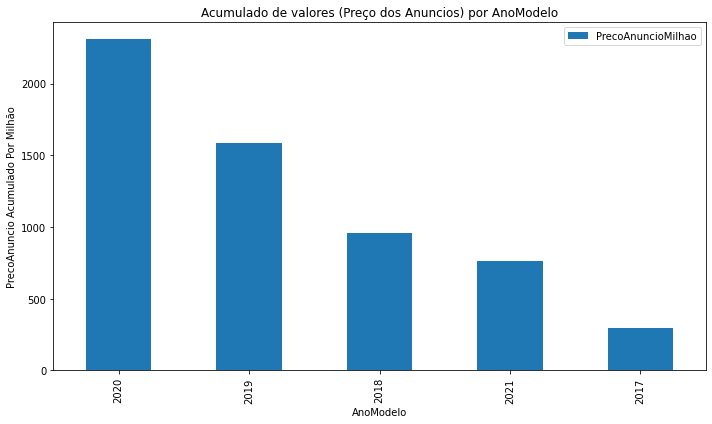

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por AnoModelo
fig, ax = plt.subplots(figsize=(10,6))
AnoModelo_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='AnoModelo', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por AnoModelo')
ax.set_xlabel('AnoModelo')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

In [ ]:
#Bloco 3: Agrupando Somatório de PrecoAnuncio por Vendedor
Vendedor_precos = df_limpo[['Vendedor', 'PrecoAnuncio']].groupby('Vendedor').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
Vendedor_precos = Vendedor_precos.reset_index()
Vendedor_precos["PrecoAnuncioMilhao"] = Vendedor_precos["PrecoAnuncio"] / 1000000

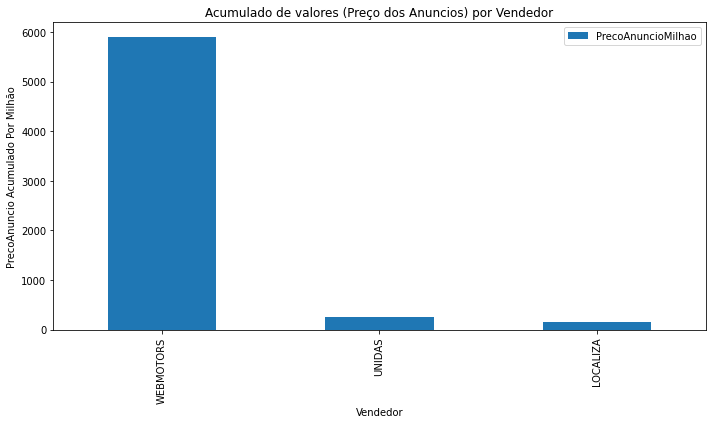

In [ ]:
#Bloco 3: Plotando Gráfico de barras acumulado por Vendedor
fig, ax = plt.subplots(figsize=(10,6))
Vendedor_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False).plot(x='Vendedor', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por Vendedor')
ax.set_xlabel('Vendedor')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

------------------------------
**Bloco 4** Criação  de 2 novas colunas no dataset

Criando 2 novas colunas no dataset de trabalho (pós limpeza) com objetivo de possibilitar construção de gráficos de barras com 2 novas categorias para análises:
* `MarcaModelo`: junção do modelo à sua Marca correspondente
* `EstadoCidade`: junção da cidade à seu estado correspondente



In [ ]:
#Bloco 4: Criação de novas colunas, "MarcaModelo" e "EstadoCidade" no Dataset de trabalho
df_limpo['MarcaModelo'] = df_limpo['Marca'] + '-' + df_limpo['Modelo']
df_limpo['EstadoCidade'] = df_limpo['Estado'] + '-' + df_limpo['Cidade']

#visualizando novas colunas ao final do dataset
df_limpo.head()

,CodigoFipe,Marca,Modelo,AnoModelo,AnoFabricacao,RegraKM,Quilometragem,PrecoAnuncio,TipoAnuncio,DescricaoSite,Cidade,Estado,Pais,MarketPlace,Vendedor,vendedorMarketplace,IdAnuncio,LinkAnuncio,DATA,MarcaModelo,EstadoCidade
1,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),5940,81450.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,110397,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30,FORD-ECOSPORT,SP-SAO PAULO
2,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),6830,81070.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,OSASCO,SP,BR,NaN,LOCALIZA,Localiza,108256,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30,FORD-ECOSPORT,SP-OSASCO
4,NaN,JEEP,RENEGADE,2019,2019,ATÉ 15 (KM),7496,94060.00,PJ,RENEGADE LONGITUDE 1.8 16V FLEX 4P C/AR - AUTO...,NITEROI,RJ,BR,NaN,LOCALIZA,Localiza,110387,https://seminovos.localiza.com/jeep_renegade_l...,2021-07-30,JEEP-RENEGADE,RJ-NITEROI
5,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),7991,81070.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,MOGI DAS CRUZES,SP,BR,NaN,LOCALIZA,Localiza,109137,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30,FORD-ECOSPORT,SP-MOGI DAS CRUZES
6,NaN,FORD,ECOSPORT,2020,2019,ATÉ 15 (KM),8583,80750.00,PJ,ECOSPORT SE 1.5 12V FLEX 4P C/AR - AUTOMATICO,SAO PAULO,SP,BR,NaN,LOCALIZA,Localiza,110078,https://seminovos.localiza.com/ford_ecosport_s...,2021-07-30,FORD-ECOSPORT,SP-SAO PAULO


------------------------------
### Grafico de Barras por EstadoCidade

In [ ]:
#Bloco 4: Agrupando Somatório de PrecoAnuncio por EstadoCidade
EstadoCidade_precos = df_limpo[['EstadoCidade', 'PrecoAnuncio']].groupby('EstadoCidade').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
EstadoCidade_precos = EstadoCidade_precos.reset_index()
EstadoCidade_precos["PrecoAnuncioMilhao"] = EstadoCidade_precos["PrecoAnuncio"] / 1000000

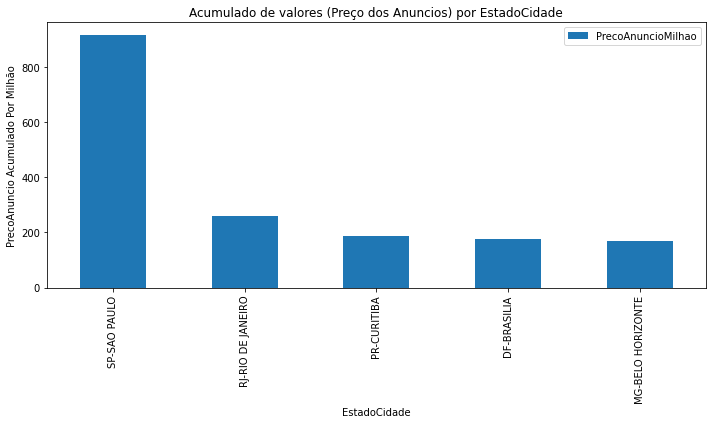

In [ ]:
#Bloco 4: Plotando Gráfico de barras acumulado por EstadoCidade
fig, ax = plt.subplots(figsize=(10,6))
EstadoCidade_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='EstadoCidade', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por EstadoCidade')
ax.set_xlabel('EstadoCidade')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

------------------------------
### Grafico de Barras por MarcaModelo

In [ ]:
#Bloco 4: Agrupando Somatório de PrecoAnuncio por MarcaModelo
MarcaModelo_precos = df_limpo[['MarcaModelo', 'PrecoAnuncio']].groupby('MarcaModelo').sum('PrecoAnuncio').sort_values('PrecoAnuncio', ascending = False)
MarcaModelo_precos = MarcaModelo_precos.reset_index()
MarcaModelo_precos["PrecoAnuncioMilhao"] = MarcaModelo_precos["PrecoAnuncio"] / 1000000

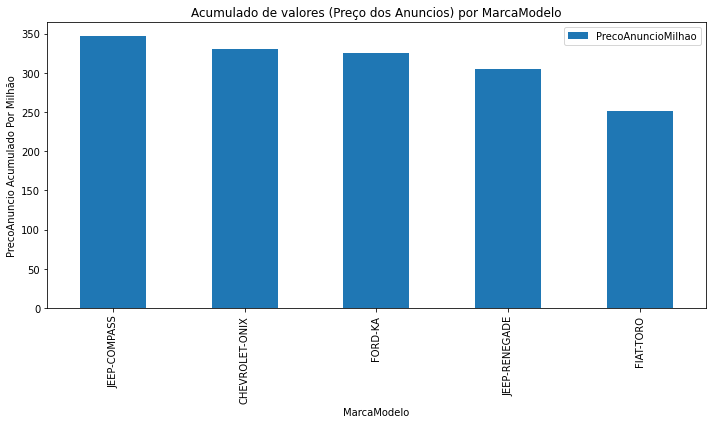

In [ ]:
#Bloco 4: Plotando Gráfico de barras acumulado por MarcaModelo
fig, ax = plt.subplots(figsize=(10,6))
MarcaModelo_precos.sort_values(by='PrecoAnuncioMilhao', ascending = False)[:5].plot(x='MarcaModelo', y='PrecoAnuncioMilhao', kind='bar', ax=ax)
ax.set_title('Acumulado de valores (Preço dos Anuncios) por MarcaModelo')
ax.set_xlabel('MarcaModelo')
ax.set_ylabel('PrecoAnuncio Acumulado Por Milhão')

plt.tight_layout()

## Conclusões
<img alt="Colaboratory logo" width="20%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDy3od-dO-kKw-E-Ses3mI6n1-3Yixhw75wA&usqp=CAU">

Com base em dados brutos obtidos do portal da **WebMotors**, efetuou-se uma análise exploratória referente aos dados de precçosde vendas de anúncios de veículos seminovos sob uma perspectiva que buscasse demonstrar os maiores valores acumulados agrupados por cateorias.

O intuíto principal foi realizar uma análise de densidade destes preços anunciados, considerando Cidade, Estado, Quilometragem, Marca e Modelo, para identificar maiores perspectivas quanto ao mercado, fornecendo insumos para auxiliar na criação de estratégias para inserção de vepiculos seminovos neste mercado.

**Ao final** foi possível demonstrar que São Paulo permanece como maior mercado com diferença considerável para os demais estados.

**Importante** deixar aqui registrado que este trabalho não esgota as possibilidades de análises e geração de *insights* possíveis mesmo nesta massa de dados utilizada. 

Uma análise exploratória muito mais rica pode, inclusive, ser obtida com o conjunto de dados com maiores variáveis.